<h1>Data set sourced from Nord Security</h1>

https://nordpass.com/most-common-passwords-list/

https://www.kaggle.com/datasets/prasertk/top-200-passwords-by-country-2021

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from glob import glob

In [2]:
pwd

'c:\\Users\\Cyber\\Documents\\CODE Lancashire\\Py-Passwords'

In [3]:
p_df = pd.read_csv('top_200_password_2020_by_country.csv', sep=',')

In [4]:
p_df.keys()

Index(['country_code', 'country', 'Rank', 'Password', 'User_count',
       'Time_to_crack', 'Global_rank', 'Time_to_crack_in_seconds'],
      dtype='object')

<h3>Initial poking of the data</h3>
<br>
My idea at this stage was to compare the habits and trends of specific countries like UK, US and Austraila. 

In [5]:
uk_df = p_df[p_df['country'] == 'United Kingdom']

In [6]:
uk_df.head

<bound method NDFrame.head of      country_code         country  Rank    Password  User_count Time_to_crack  \
9200           gb  United Kingdom     1      123456      571107    < 1 second   
9201           gb  United Kingdom     2    password      423192    < 1 second   
9202           gb  United Kingdom     3   liverpool      224160    < 1 second   
9203           gb  United Kingdom     4   password1      162086    < 1 second   
9204           gb  United Kingdom     5   123456789      152801    < 1 second   
...           ...             ...   ...         ...         ...           ...   
9395           gb  United Kingdom   196      123qwe        8405    < 1 second   
9396           gb  United Kingdom   197  astonvilla        8297       12 Days   
9397           gb  United Kingdom   198    millwall        8281    < 1 second   
9398           gb  United Kingdom   199    london12        8215     2 Seconds   
9399           gb  United Kingdom   200  newcastle1        8178    52 Seconds  

In [7]:
us_df = p_df[p_df['country'] == 'United States']

In [8]:
us_df.head

<bound method NDFrame.head of      country_code        country  Rank   Password  User_count Time_to_crack  \
9400           us  United States     1     123456     3572081    < 1 second   
9401           us  United States     2   password     1730765    < 1 second   
9402           us  United States     3      12345      958799    < 1 second   
9403           us  United States     4  123456789      873522    < 1 second   
9404           us  United States     5  password1      666746    < 1 second   
...           ...            ...   ...        ...         ...           ...   
9595           us  United States   196   asshole1       51522    < 1 second   
9596           us  United States   197      pussy       51493    < 1 second   
9597           us  United States   198     muffin       51384    < 1 second   
9598           us  United States   199     dancer       51238    < 1 second   
9599           us  United States   200   madison1       50989    < 1 second   

      Global_rank  Ti

In [9]:
au_df = p_df[p_df['country'] == 'Australia']

In [10]:
au_df.head

<bound method NDFrame.head of     country_code    country  Rank   Password  User_count Time_to_crack  \
0             au  Australia     1     123456      308483    < 1 second   
1             au  Australia     2   password      191880    < 1 second   
2             au  Australia     3   lizottes       98220       3 Hours   
3             au  Australia     4  password1       86884    < 1 second   
4             au  Australia     5  123456789       75856    < 1 second   
..           ...        ...   ...        ...         ...           ...   
195           au  Australia   196     jayden        4631    < 1 second   
196           au  Australia   197     19weed        4623    23 Seconds   
197           au  Australia   198   training        4312       2 Hours   
198           au  Australia   199    boobies        4266    < 1 second   
199           au  Australia   200     connor        4192    < 1 second   

     Global_rank  Time_to_crack_in_seconds  
0            1.0                    

<br>
<h3>.... but they proved kind of boring.</h3>

<h3>So I began looking at which countries had the most difficult passwords instead</h3>
<br>

C:\Users\Cyber\AppData\Local\Temp\ipykernel_11464\2453303920.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='Time_to_crack_in_seconds', data=top_15, palette='rocket', ax=axes[0])
C:\Users\Cyber\AppData\Local\Temp\ipykernel_11464\2453303920.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\Cyber\AppData\Local\Temp\ipykernel_11464\2453303920.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='Time_to_crack_in_seconds', data=bottom_15, palette='viridis', ax=axes[1])
C:\Users\Cyber\AppData\Local\Tem

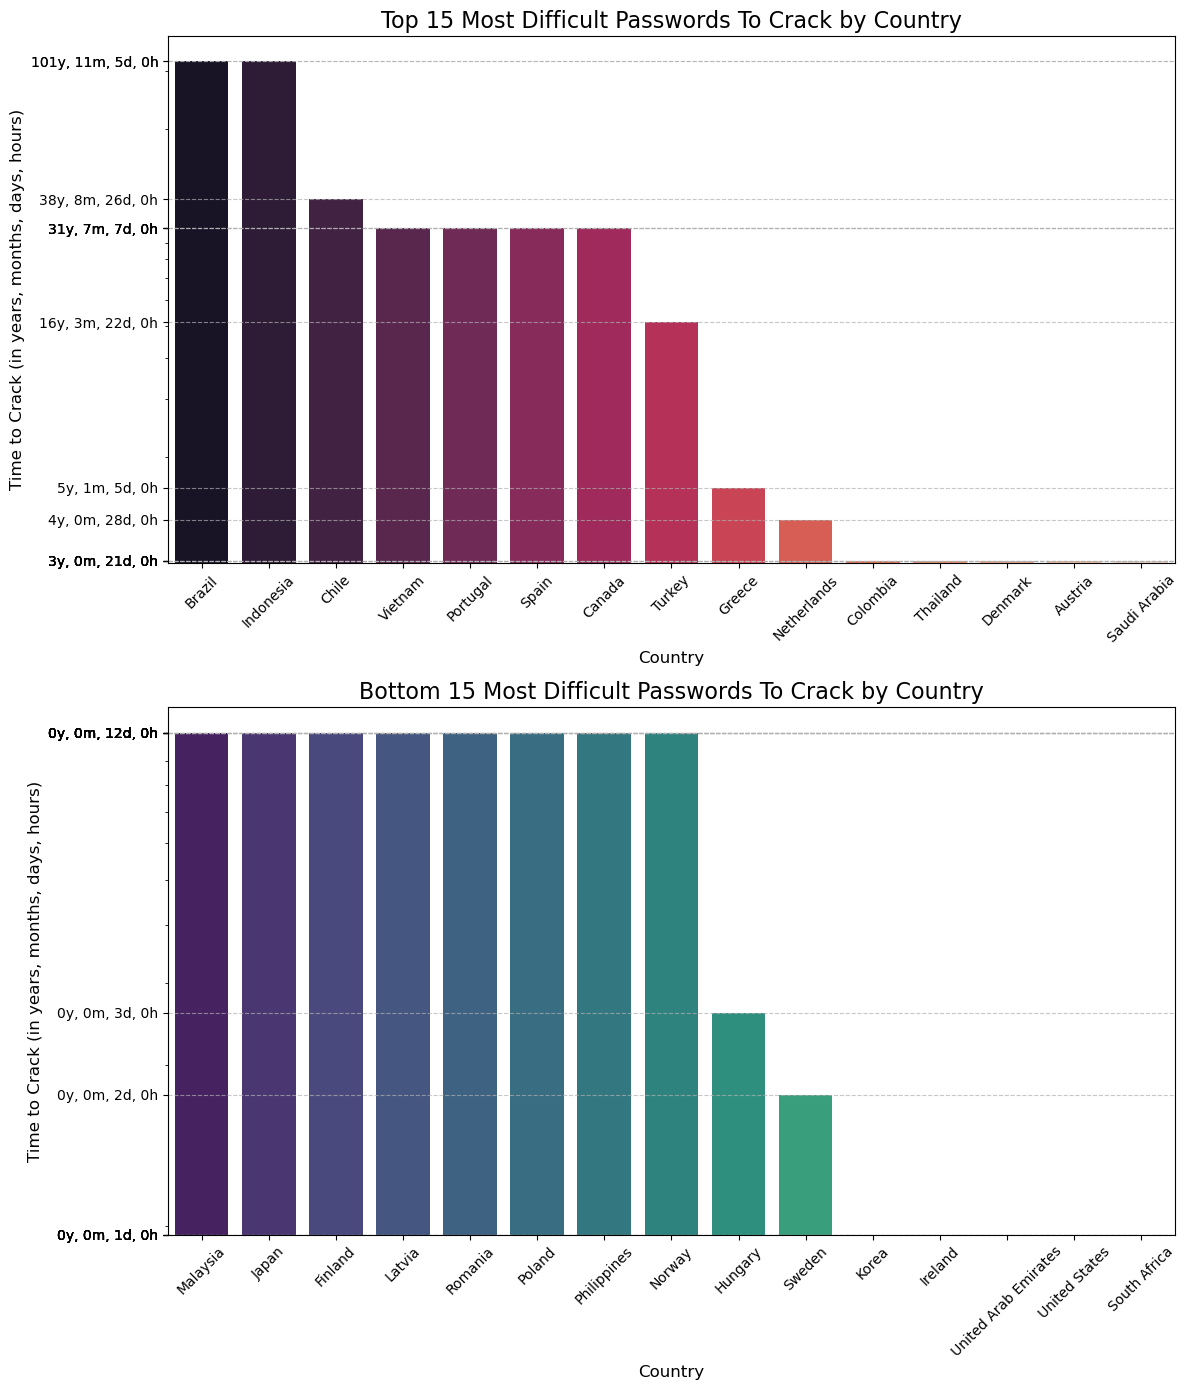

In [29]:
def convert_seconds_to_human_readable(seconds):
    """Convert seconds to a human-readable format: years, months, days, hours."""
    year = 365 * 24 * 60 * 60
    month = 30 * 24 * 60 * 60  # Approximate month
    day = 24 * 60 * 60
    hour = 60 * 60
    
    years = seconds // year
    seconds %= year
    months = seconds // month
    seconds %= month
    days = seconds // day
    seconds %= day
    hours = seconds // hour
    
    # Return a readable string
    return f"{years}y, {months}m, {days}d, {hours}h"

def analyze_passwords_by_country(df):
    # Ensure Time_to_crack_in_seconds is treated as numeric
    df['Time_to_crack_in_seconds'] = pd.to_numeric(df['Time_to_crack_in_seconds'], errors='coerce')

    # 1. Most difficult passwords (highest time to crack per country)
    most_difficult_passwords = df.loc[df.groupby('country')['Time_to_crack_in_seconds'].idxmax()]
    
    # Convert time to a human-readable format
    most_difficult_passwords['Human_Readable_Time'] = most_difficult_passwords['Time_to_crack_in_seconds'].apply(convert_seconds_to_human_readable)

    return most_difficult_passwords.reset_index(drop=True)

def visualize_passwords(most_difficult_passwords):
    # Sort the DataFrame by Time to Crack
    most_difficult_passwords = most_difficult_passwords.sort_values(by='Time_to_crack_in_seconds', ascending=False)

    # Split into Top 15 and Bottom 15
    top_15 = most_difficult_passwords.head(15)
    bottom_15 = most_difficult_passwords.tail(15)

    # Convert 3 years to seconds for rescaling
    three_years_in_seconds = 3 * 365 * 24 * 60 * 60

    # Convert 1 day to seconds for rescaling
    one_day_in_seconds = 1 * 24 * 60 * 60

    # Create a figure with two subplots
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 14))

    # Plot Top 15 Most Difficult Passwords
    sns.barplot(x='country', y='Time_to_crack_in_seconds', data=top_15, palette='rocket', ax=axes[0])
    axes[0].set_title('Top 15 Most Difficult Passwords To Crack by Country', fontsize=16)
    axes[0].set_xlabel('Country', fontsize=12)
    axes[0].set_ylabel('Time to Crack (in years, months, days, hours)', fontsize=12)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    # Set a logarithmic y-axis scale for the top 15
    axes[0].set_yscale('log')
    axes[0].set_ylim(bottom=three_years_in_seconds)  # Set lower limit to 3 years in seconds

    # Format y-axis ticks to display human-readable time
    axes[0].set_yticks(top_15['Time_to_crack_in_seconds'])
    axes[0].set_yticklabels(top_15['Human_Readable_Time'])

    # Plot Bottom 15 Most Difficult Passwords
    sns.barplot(x='country', y='Time_to_crack_in_seconds', data=bottom_15, palette='viridis', ax=axes[1])
    axes[1].set_title('Bottom 15 Most Difficult Passwords To Crack by Country', fontsize=16)
    axes[1].set_xlabel('Country', fontsize=12)
    axes[1].set_ylabel('Time to Crack (in years, months, days, hours)', fontsize=12)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)

    # Set a logarithmic y-axis scale for the bottom 15
    axes[1].set_yscale('log')
    axes[1].set_ylim(bottom=one_day_in_seconds)  # Set lower limit to 1 day in seconds

    # Format y-axis ticks to display human-readable time
    axes[1].set_yticks(bottom_15['Time_to_crack_in_seconds'])
    axes[1].set_yticklabels(bottom_15['Human_Readable_Time'])

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Load the dataset
file_path = 'top_200_password_2020_by_country.csv'
p_df = pd.read_csv(file_path, sep=',')


# Analyze the passwords
most_difficult_passwords = analyze_passwords_by_country(p_df)

# Visualize the analysis results
visualize_passwords(most_difficult_passwords)


In [50]:
avg_crack_time_by_country = p_df.groupby('country')['Time_to_crack_in_seconds'].mean().sort_values(ascending=False)

C:\Users\Cyber\AppData\Local\Temp\ipykernel_11464\2711350409.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average_Crack_Time_Seconds', y='country', data=top_25, palette='rocket')


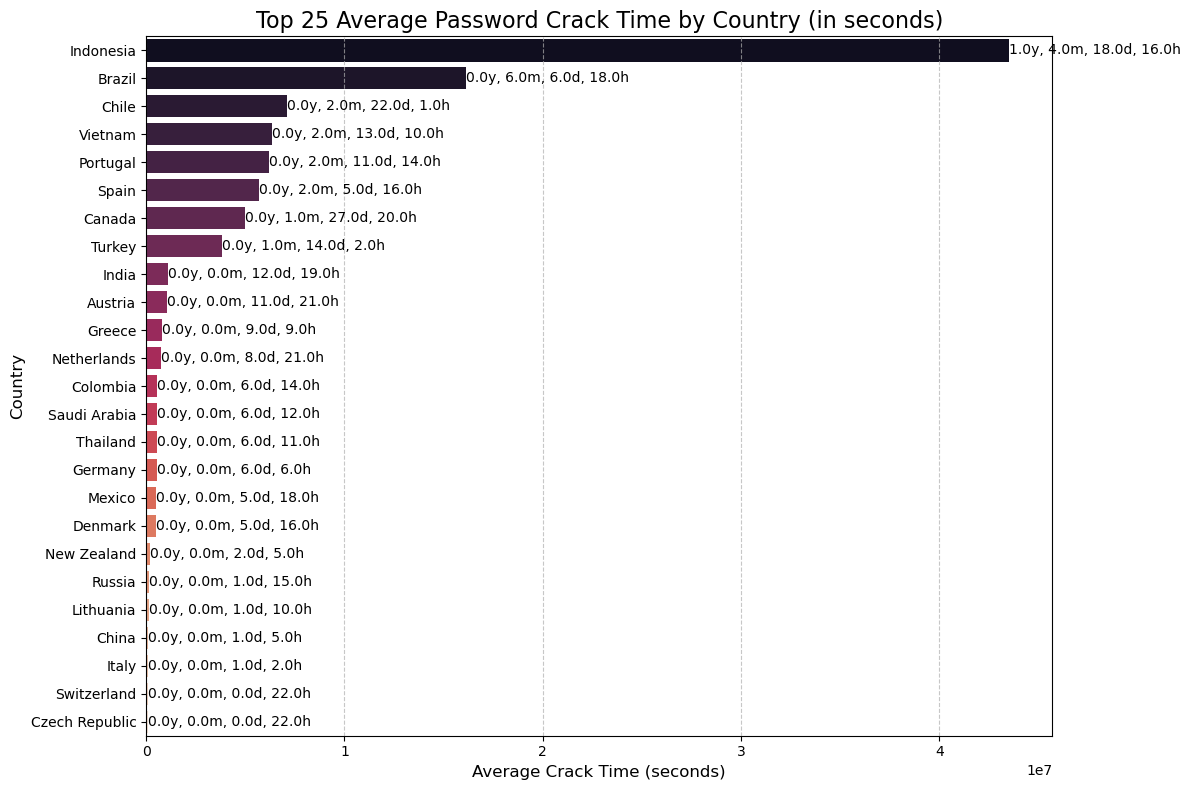

C:\Users\Cyber\AppData\Local\Temp\ipykernel_11464\2711350409.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average_Crack_Time_Seconds', y='country', data=bottom_25, palette='viridis')


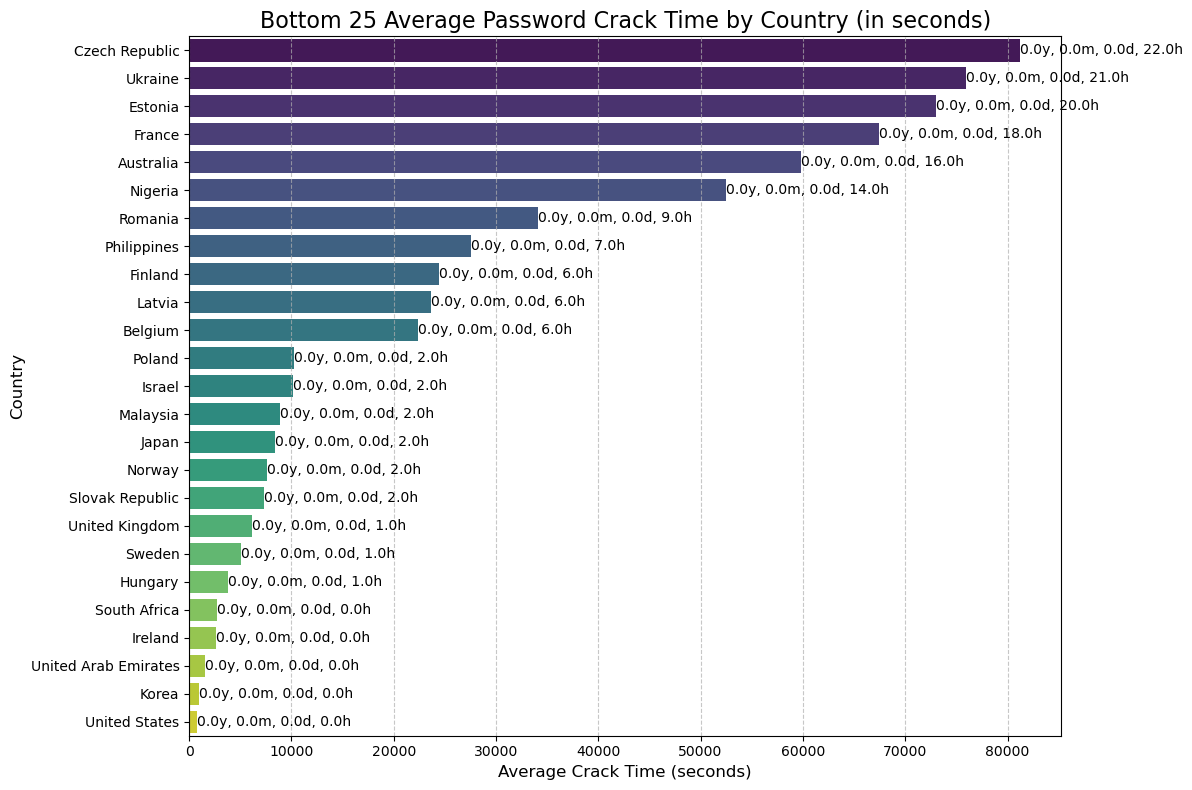

In [25]:
def convert_seconds_to_human_readable(seconds):
    """Convert seconds to a human-readable format: years, months, days, hours."""
    year = 365 * 24 * 60 * 60
    month = 30 * 24 * 60 * 60  # Approximate month
    day = 24 * 60 * 60
    hour = 60 * 60
    
    years = seconds // year
    seconds %= year
    months = seconds // month
    seconds %= month
    days = seconds // day
    seconds %= day
    hours = seconds // hour
    
    # Return a readable string
    return f"{years}y, {months}m, {days}d, {hours}h"

# Load the dataset
file_path = 'top_200_password_2020_by_country.csv'
p_df = pd.read_csv(file_path, sep=',')

# Group by country and calculate the average time to crack in seconds
avg_crack_time_by_country = p_df.groupby('country')['Time_to_crack_in_seconds'].mean().sort_values(ascending=False)

# Convert average crack times to a human-readable format
avg_crack_time_human_readable = avg_crack_time_by_country.apply(convert_seconds_to_human_readable)

# Create a DataFrame for plotting
result_df = pd.DataFrame({
    'Average_Crack_Time_Seconds': avg_crack_time_by_country,
    'Average_Crack_Time_Human_Readable': avg_crack_time_human_readable
}).reset_index()

# Split the data into Top 25 and Bottom 25
top_25 = result_df.head(25)
bottom_25 = result_df.tail(25)

# Plotting the Top 25 average crack time by country
plt.figure(figsize=(12, 8))
sns.barplot(x='Average_Crack_Time_Seconds', y='country', data=top_25, palette='rocket')
plt.title('Top 25 Average Password Crack Time by Country (in seconds)', fontsize=16)
plt.xlabel('Average Crack Time (seconds)', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Add data labels to the bars for Top 25
for index, value in enumerate(top_25['Average_Crack_Time_Seconds']):
    plt.text(value, index, top_25['Average_Crack_Time_Human_Readable'].iloc[index], 
             color='black', ha='left', va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting the Bottom 25 average crack time by country
plt.figure(figsize=(12, 8))
sns.barplot(x='Average_Crack_Time_Seconds', y='country', data=bottom_25, palette='viridis')
plt.title('Bottom 25 Average Password Crack Time by Country (in seconds)', fontsize=16)
plt.xlabel('Average Crack Time (seconds)', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Add data labels to the bars for Bottom 25
for index, value in enumerate(bottom_25['Average_Crack_Time_Seconds']):
    plt.text(value, index, bottom_25['Average_Crack_Time_Human_Readable'].iloc[index], 
             color='black', ha='left', va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


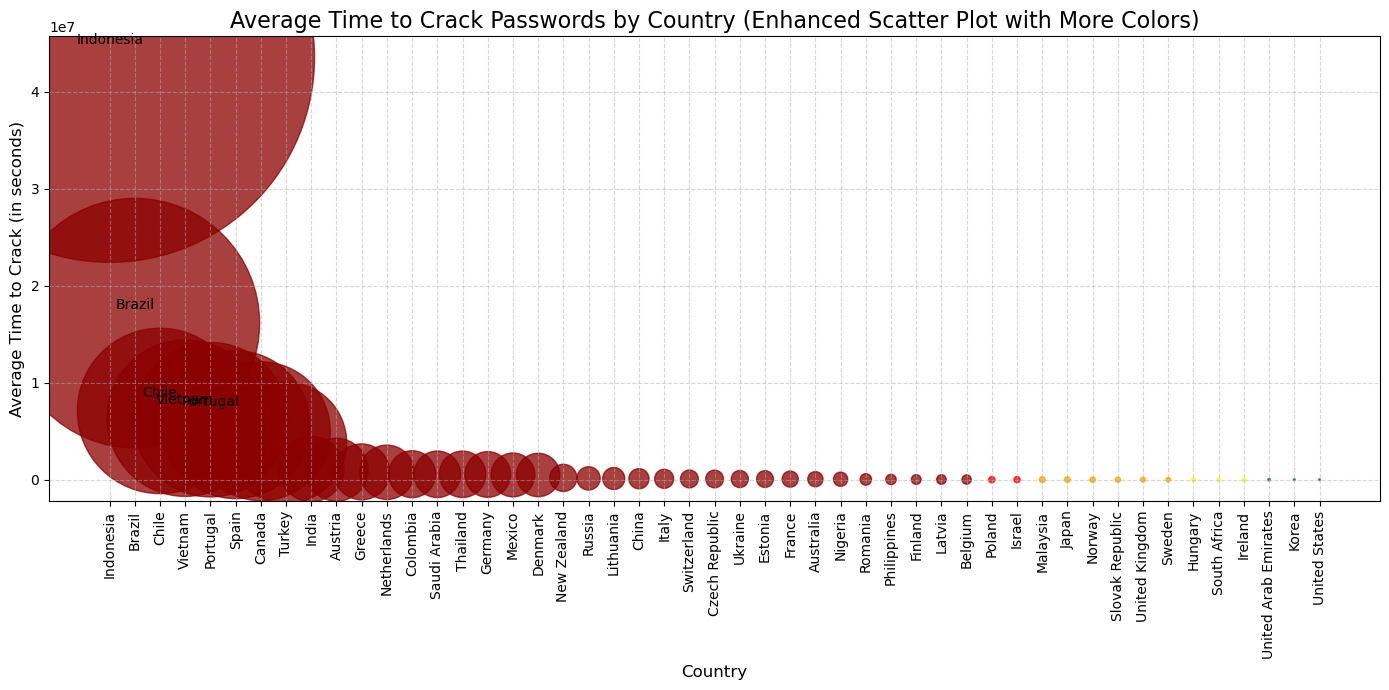

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Example average crack time data (replace with your actual data)
# avg_crack_time_by_country = ...

# Define color coding for different cracking time ranges
colors = np.where(avg_crack_time_by_country > 15000, 'darkred', 
                  np.where(avg_crack_time_by_country > 10000, 'red', 
                  np.where(avg_crack_time_by_country > 5000, 'orange', 
                  np.where(avg_crack_time_by_country > 2000, 'yellow', 'green'))))

# Adjust marker sizes with a smaller scaling factor
sizes = avg_crack_time_by_country / 500  # Dividing by 500 to significantly reduce size of large points

# Create the scatter plot
plt.figure(figsize=(14, 7))
scatter = plt.scatter(avg_crack_time_by_country.index, avg_crack_time_by_country.values, 
                      color=colors, s=sizes, alpha=0.75)

# Add title and labels
plt.title('Average Time to Crack Passwords by Country (Enhanced Scatter Plot with More Colors)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Time to Crack (in seconds)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=10)

# Add a grid for clarity
plt.grid(True, linestyle='--', alpha=0.5)

# Annotate top 5 countries with the longest cracking times
for i, country in enumerate(avg_crack_time_by_country.index[:5]):
    plt.annotate(country, (avg_crack_time_by_country.index[i], avg_crack_time_by_country.values[i]),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.show()


<h3>Most common passwords worldwide</h3>

Here are the most common passwords used online.

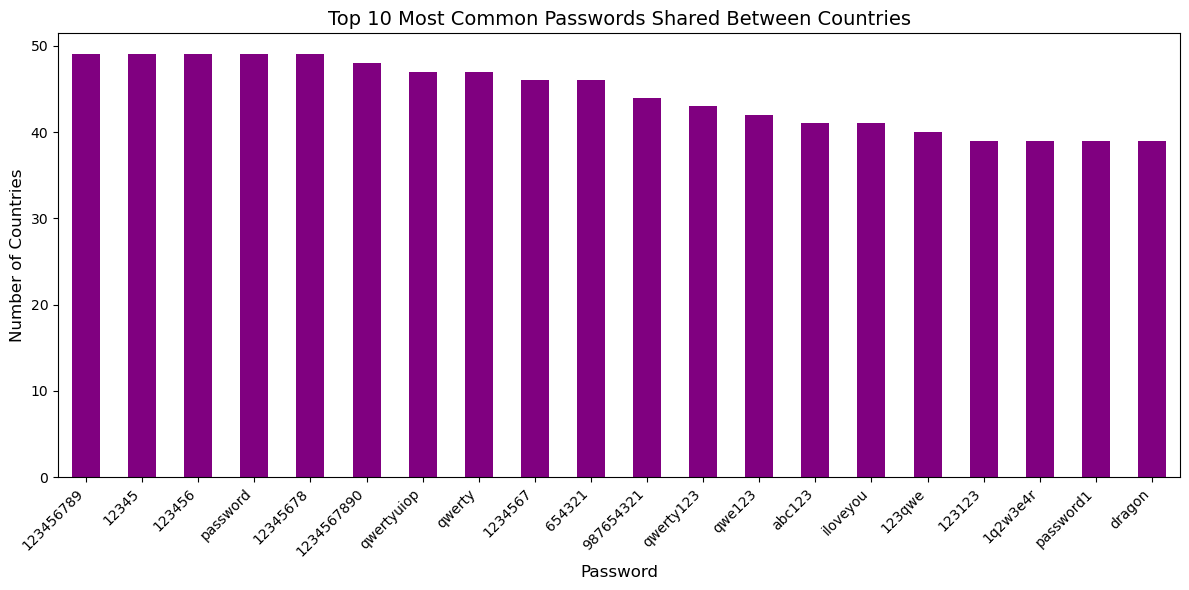

In [53]:


# Group the data by Password to count how many countries share each password
password_country_count = p_df.groupby('Password')['country'].nunique().sort_values(ascending=False)

# Filter for passwords that are shared by at least 5 countries (adjust as needed)
shared_passwords = password_country_count[password_country_count >= 5].head(20)

# Plotting
plt.figure(figsize=(12, 6))
shared_passwords.plot(kind='bar', color='purple')

# Add title and labels
plt.title('Top 10 Most Common Passwords Shared Between Countries', fontsize=14)
plt.xlabel('Password', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


<h3>Most popular passwords, unique per country</h3>

I wanted to work out what the most common password was that was unique to each country.


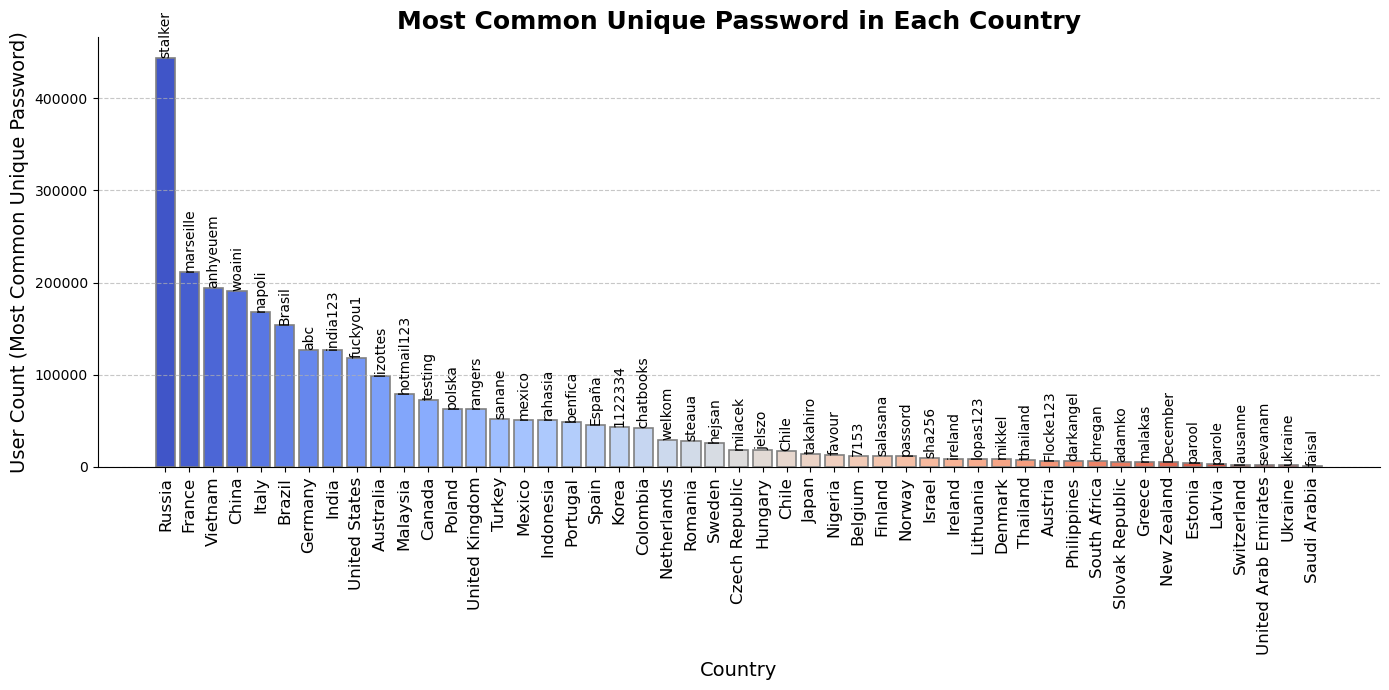

In [54]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'top_200_password_2020_by_country.csv'
p_df = pd.read_csv(file_path, sep=',')

# Step 1: Find unique passwords used only in one country
unique_passwords_df = p_df.groupby('Password').filter(lambda x: x['country'].nunique() == 1)

# Step 2: Find the most common unique password for each country
most_common_unique_per_country = unique_passwords_df.loc[unique_passwords_df.groupby('country')['User_count'].idxmax()]

# Step 3: Sort by user count for better visualization
most_common_unique_per_country = most_common_unique_per_country.sort_values(by='User_count', ascending=False)

# Step 4: Set up a color palette for the bars using seaborn
colors = sns.color_palette("coolwarm", len(most_common_unique_per_country))

# Plotting the results with improved aesthetics
plt.figure(figsize=(14, 7))
bars = plt.bar(most_common_unique_per_country['country'], most_common_unique_per_country['User_count'], 
               color=colors, edgecolor='grey', linewidth=1.2)

# Add title and labels
plt.title('Most Common Unique Password in Each Country', fontsize=18, fontweight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('User Count (Most Common Unique Password)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=12)

# Step 5: Annotate the bars with the passwords (rotate text and format)
for bar, password in zip(bars, most_common_unique_per_country['Password']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, password, 
             ha='center', va='bottom', fontsize=10, rotation=90, color='black')

# Add a light grid for better readability
plt.grid(True, linestyle='--', axis='y', alpha=0.7)

# Remove unnecessary borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Tight layout to adjust spacing
plt.tight_layout()

# Show the plot
plt.show()
